# Fixed-active-dormant

## imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sqlite3

In [2]:
import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

In [3]:
fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

#palette = []
#sns.set_palette(sns.comor_palette(palette))

## utils
- includes behavior and default (no behavior) as comparison

In [4]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    transactions = evaler.eval('TransactionQuantity')
    agents = evaler.eval('Agents')
    
    storage_id = agents.loc[agents["Prototype"] == "Storage"]["AgentId"]
    transaction_subset = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_s': transaction_subset}
    
    return name, data

## input file names below

In [5]:
filenames = ['no-behavior.sqlite', 'behavior-example.sqlite']

## grab all data

In [6]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

# Plots
## transactions subplots

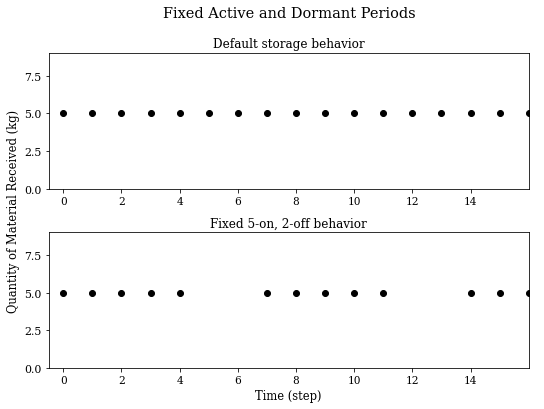

In [7]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,9)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= 'k')
ax0.set_title('Default storage behavior')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax1.scatter(data['behavior-example']['t_s']['Time'],
            data['behavior-example']['t_s']['Quantity'],
            color= 'k')
ax1.set_title('Fixed 5-on, 2-off behavior')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

plt.savefig('plots/transactions-subplots', transparent=True)

## Cumulative received subplots

In [8]:
data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
data['behavior-example']['t_s']['CumQuant'] = data['behavior-example']['t_s']['Quantity'].cumsum()

<ipython-input-8-2164976da79d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
<ipython-input-8-2164976da79d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['behavior-example']['t_s']['CumQuant'] = data['behavior-example']['t_s']['Quantity'].cumsum()


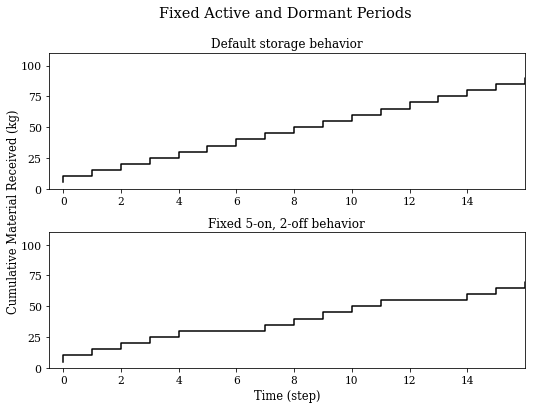

In [9]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,110)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 101, 25))


ax0.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['CumQuant'],
         color= 'k')
ax0.set_title('Default storage behavior')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


ax1.step(data['behavior-example']['t_s']['Time'],
         data['behavior-example']['t_s']['CumQuant'],
         color= 'k')
ax1.set_title('Fixed 5-on, 2-off behavior')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

plt.savefig('plots/cumulative-subplots', transparent=True)


## Cumulative single plot

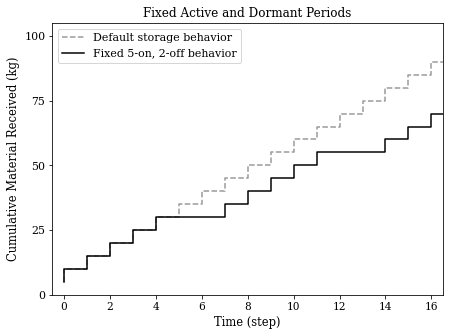

In [10]:
fig = plt.figure(figsize = (7, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,16.5)
plt.ylim(0,105)
ax.set_xticks(np.arange(0, 17, 2))
ax.set_yticks(np.arange(0, 101, 25))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre',
        color= '0.6', ls='dashed', label='Default storage behavior')

ax.step(data['behavior-example']['t_s']['Time'],
        data['behavior-example']['t_s']['CumQuant'],
        where='pre',
        color= 'k', label='Fixed 5-on, 2-off behavior')

ax.legend(loc = 'upper left')

plt.title('Fixed Active and Dormant Periods')

plt.savefig('plots/cumulative-oneplot', transparent=True)